#**Example: Working With Multi-Modal Data in NNs**

Import libraries and make two fake datasets, of 5000 observations each.

In [12]:
import numpy as np

some_labels = np.random.random((5000,1))
some_numeric_data = np.random.random((5000,5))
some_image_arrays = np.random.uniform(size=(5000,28,28,3),low=0,high=255)

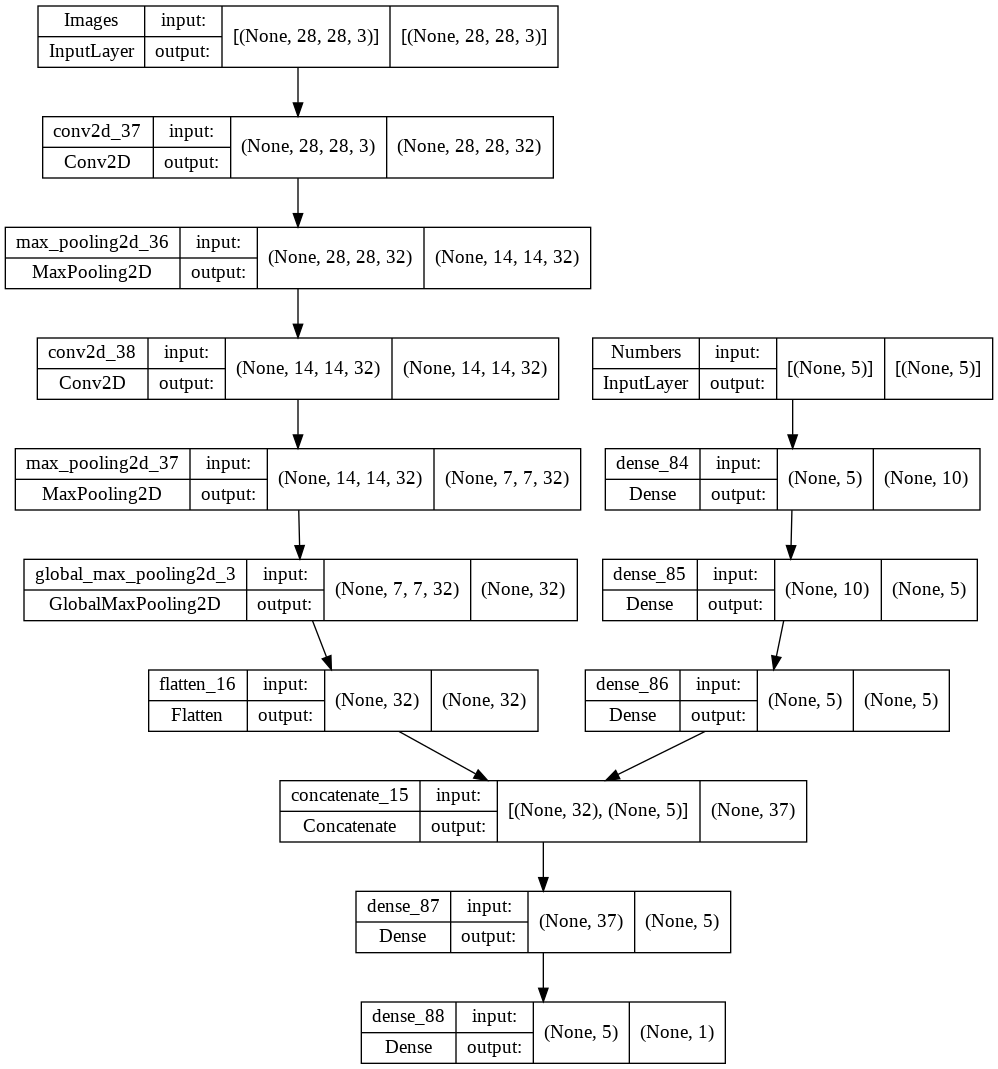

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define image input branch.
input_image = layers.Input(shape=(some_image_arrays.shape[1],some_image_arrays.shape[2],some_image_arrays.shape[3]), name="Images")
x = layers.Conv2D(filters=32,kernel_size=3,padding="same",activation="relu")(input_image)
x = layers.MaxPool2D(2,strides=2)(x)
x = layers.Conv2D(filters=32,kernel_size=3,padding="same",activation="relu")(x)
x = layers.MaxPool2D(2,strides=2)(x)
x = layers.GlobalMaxPooling2D()(x) # Instead of pooling the filters down to scalars, you could also use layers.Flatten() here.
image_output = layers.Flatten()(x)

# Define numeric input branch
input_numeric = layers.Input(shape=some_numeric_data.shape[1],name="Numbers")
x = layers.Dense(10,activation="relu")(input_numeric)
x = layers.Dense(5,activation="relu")(x)
numeric_output = layers.Dense(5,activation="relu")(x) #Another option might be to have dense matrices that are wider, and you reshape them to 28x28x3 to add.

merge = layers.Concatenate()([image_output,numeric_output])
x = layers.Dense(5,activation="relu")(merge)
final_output = layers.Dense(1)(x)

branch_model = keras.Model(inputs=[input_image,input_numeric],outputs=final_output)

keras.utils.plot_model(branch_model,show_shapes=True)

Now, let's compile our model...

In [41]:
branch_model.compile(optimizer="adam",loss="mse")

And, lets fit the model to the random data... 

In [43]:
history = branch_model.fit(x=[some_image_arrays,some_numeric_data],y=some_labels, epochs=2, batch_size=25)

Epoch 1/2
200/200 [==============================] - 5s 27ms/step - loss: 0.2473
Epoch 2/2
200/200 [==============================] - 5s 27ms/step - loss: 0.2246
